<a href="https://colab.research.google.com/github/subhojitpramanick/diabetes_prediction-/blob/main/diabates_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# *Dataset Analysis*


In [ ]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#Independent Features->

In [ ]:
#Duplicate Values
df.duplicated().sum()

3854

We need to clean those **Duplicated Rows** from the dataset


In [ ]:
#delete duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(96146, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Missing value examine
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


NO **Missing Values** are present

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# Univariate analysis

In [ ]:
sns.set(style="whitegrid")

Categorical Columns


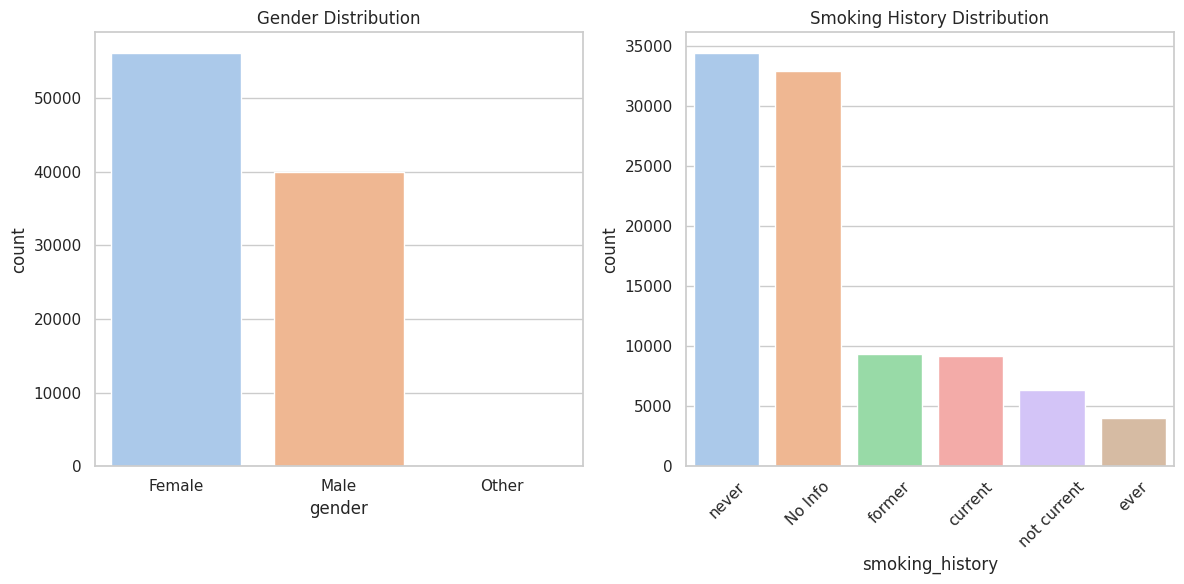

In [ ]:
# Univariate analysis of categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='smoking_history', palette='pastel', order=df['smoking_history'].value_counts().index)
plt.title('Smoking History Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate analysis of numerical variables

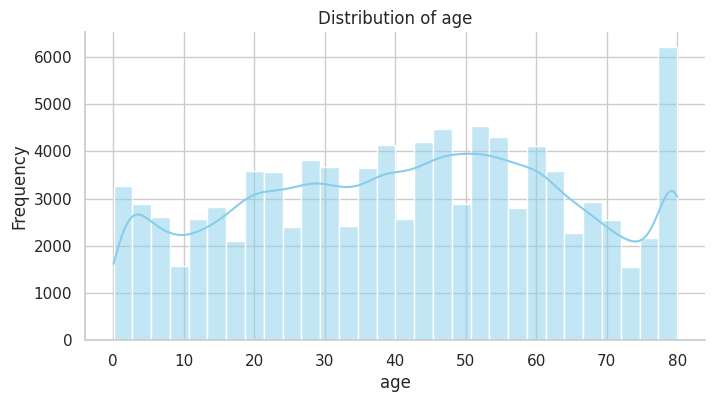

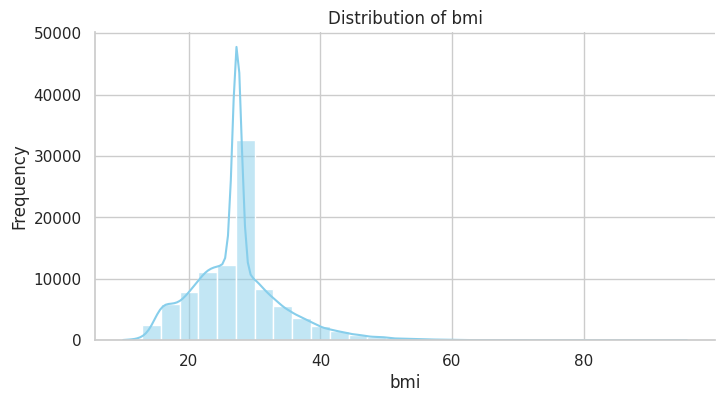

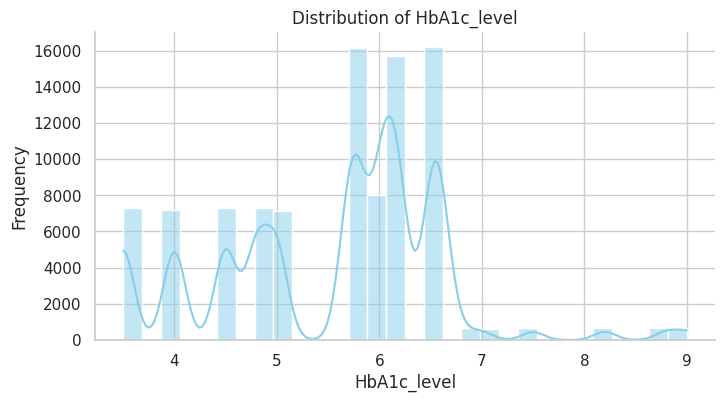

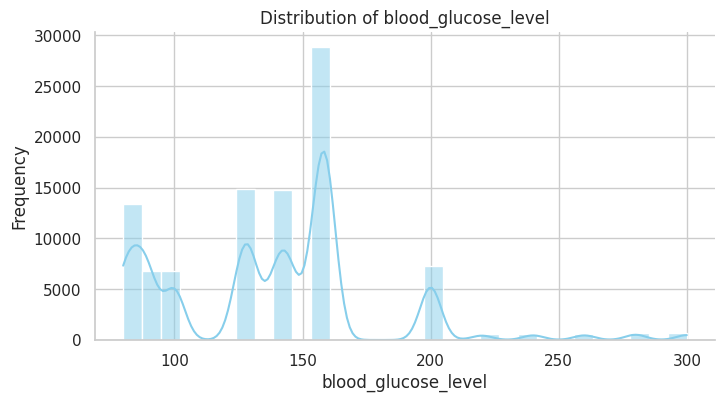

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    sns.despine()
    plt.show()

# Univariate analysis of binary variables

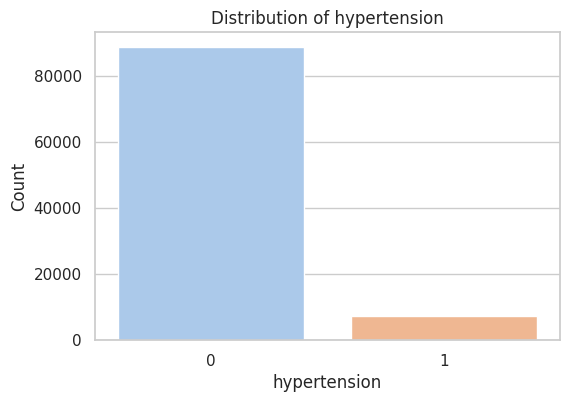

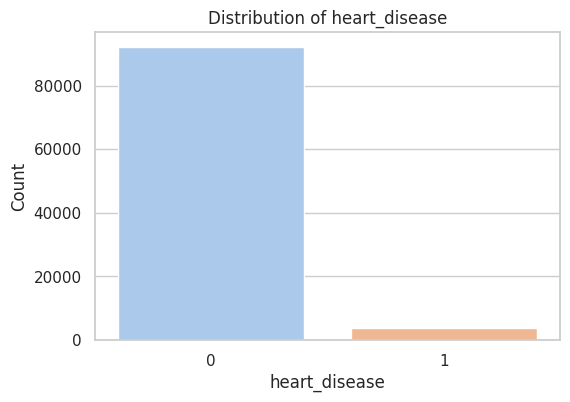

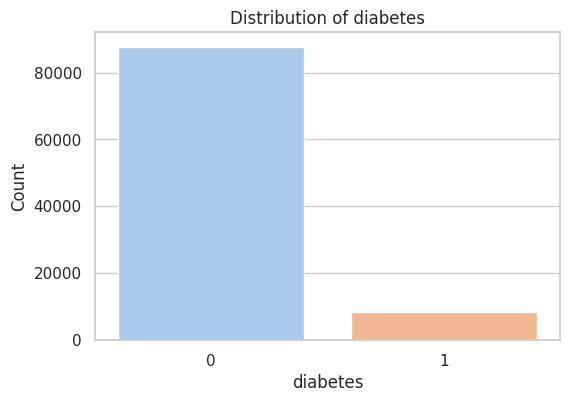

In [ ]:
binary_columns = ['hypertension', 'heart_disease', 'diabetes']
for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


# Bivariate analysis:

**Categorical vs Target (diabetes)**

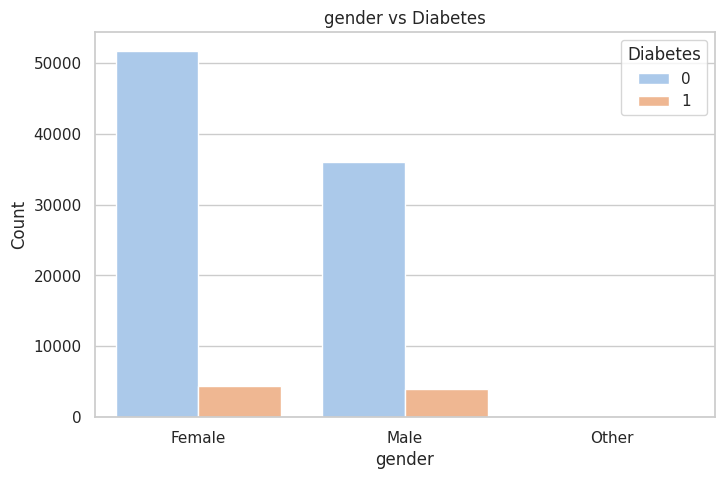

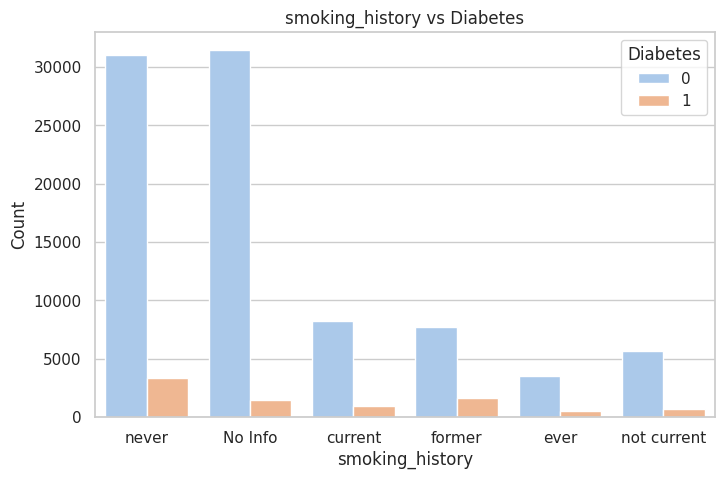

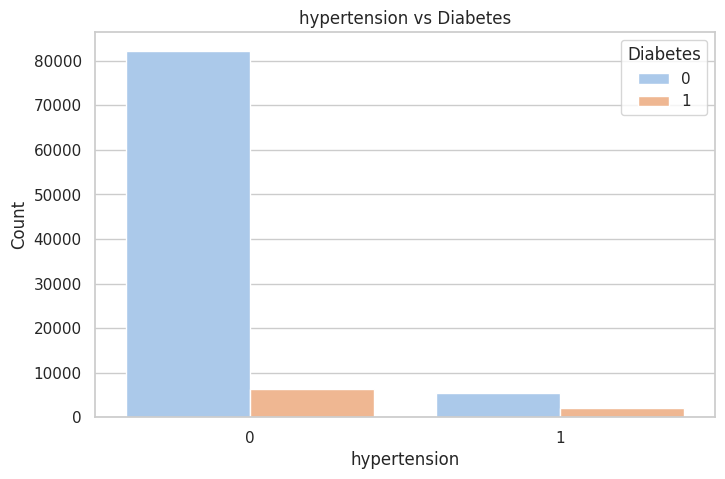

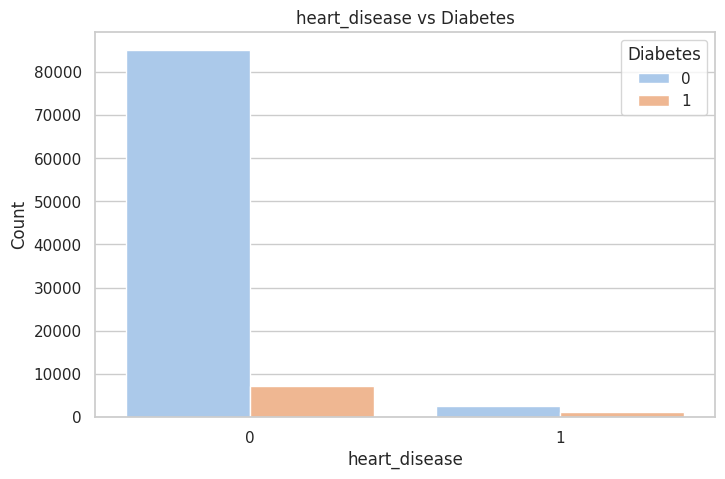

In [ ]:
categorical_columns = ['gender', 'smoking_history', 'hypertension', 'heart_disease']
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='diabetes', palette='pastel')
    plt.title(f'{col} vs Diabetes')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diabetes', loc='upper right')
    plt.show()

**Numerical vs Target (diabetes)**

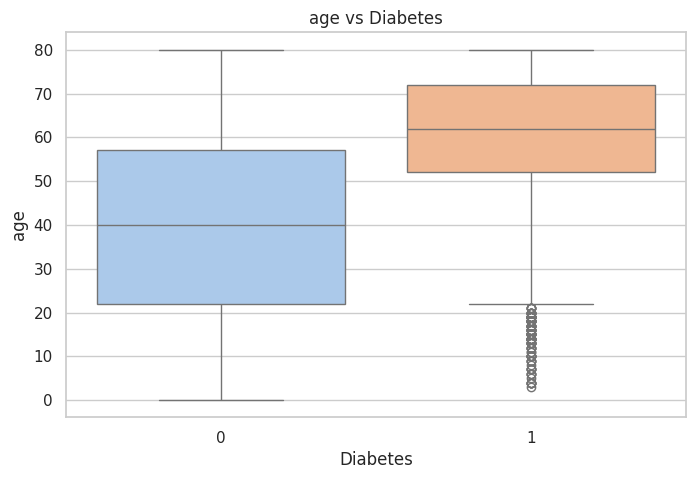

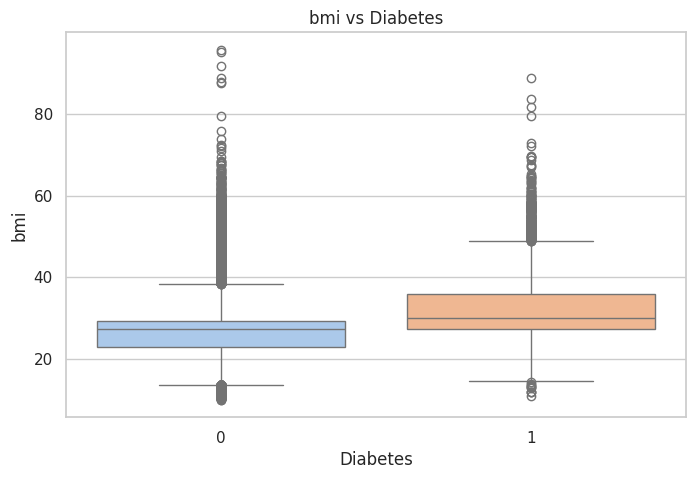

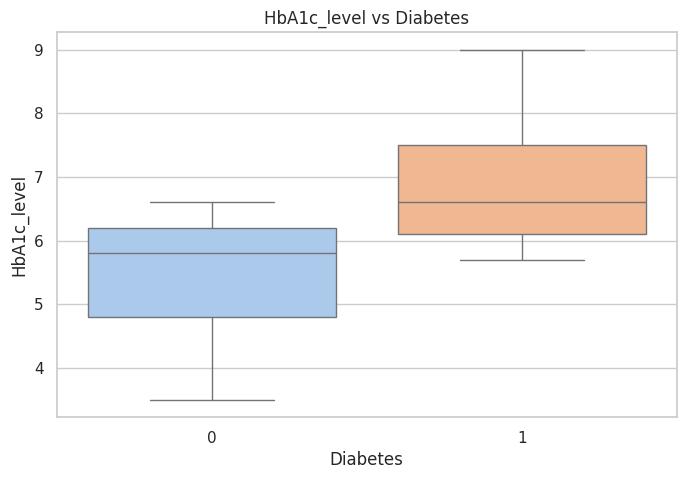

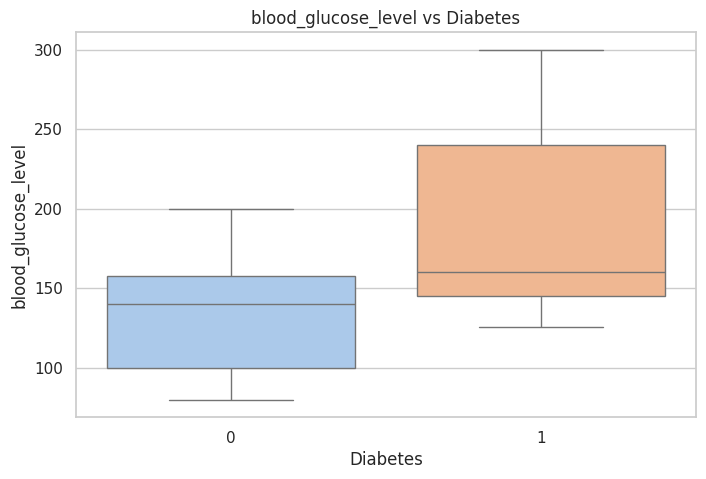

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='diabetes', y=col, palette='pastel')
    plt.title(f'{col} vs Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(col)
    plt.show()

# Correlation matrix for numerical features

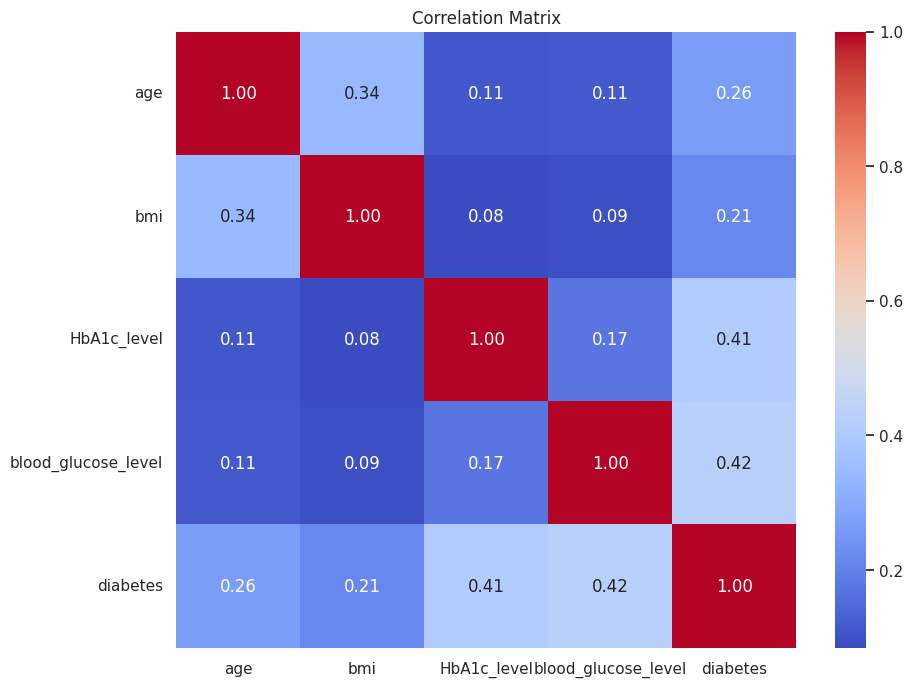

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns + ['diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis

**Pair Plot**

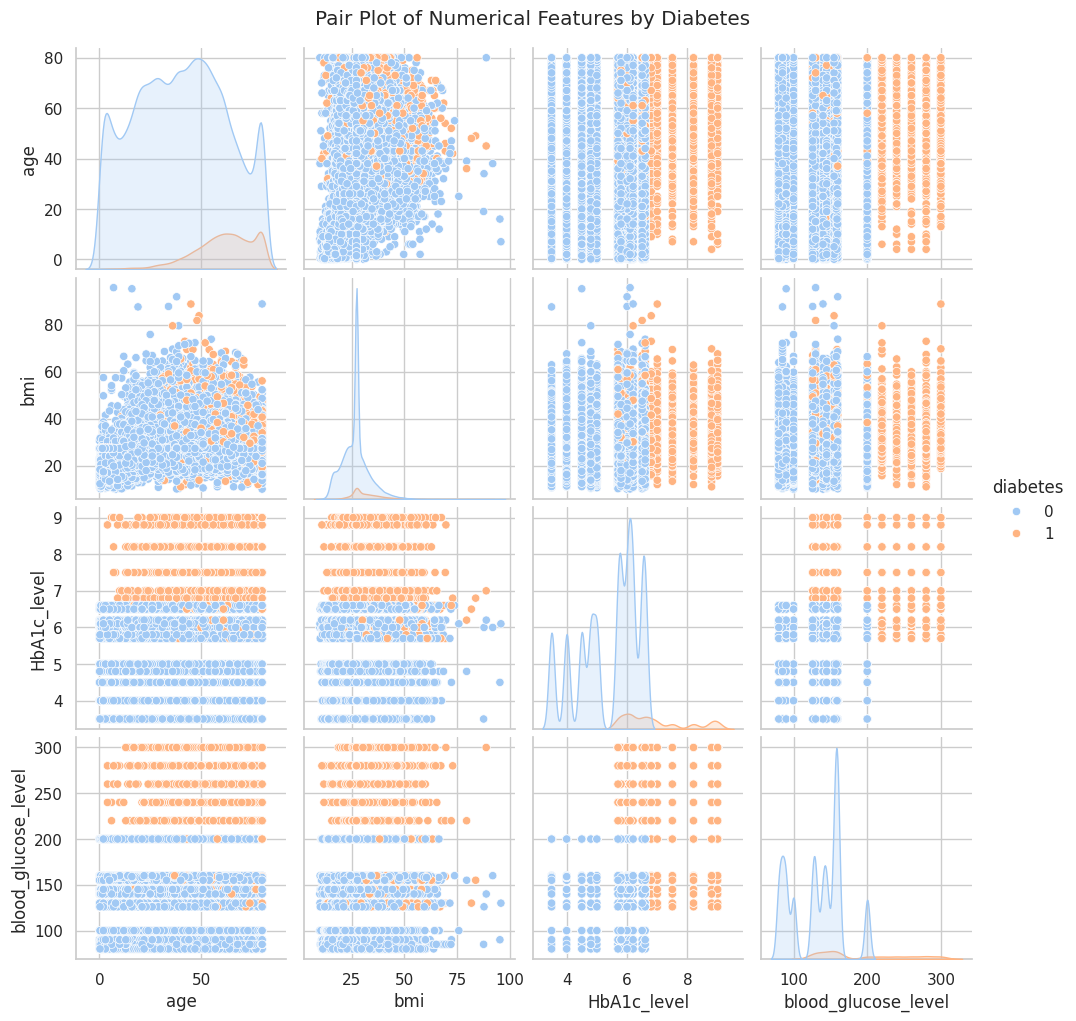

In [ ]:
sns.pairplot(df, hue='diabetes', vars=numerical_columns, palette='pastel', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Numerical Features by Diabetes', y=1.02)
plt.show()

**Interactions between Categorical and Numerical Features**

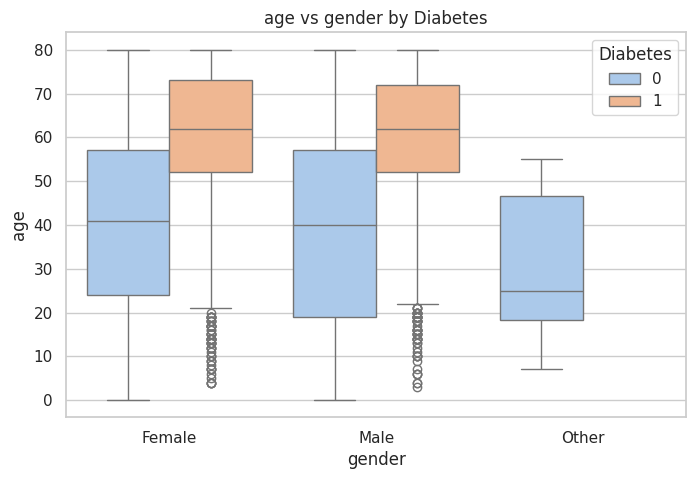

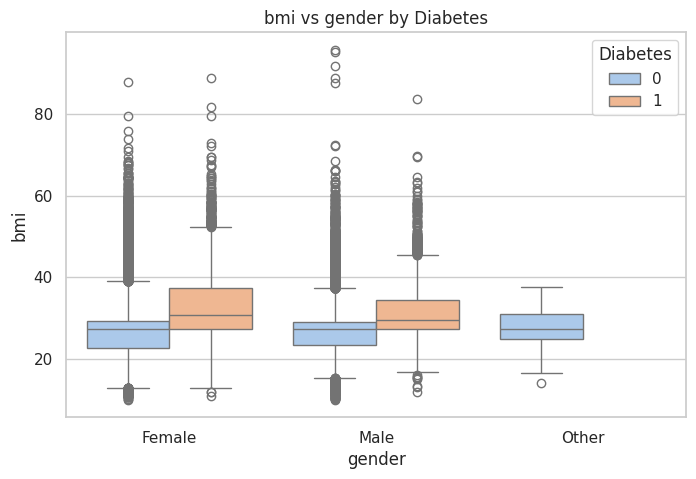

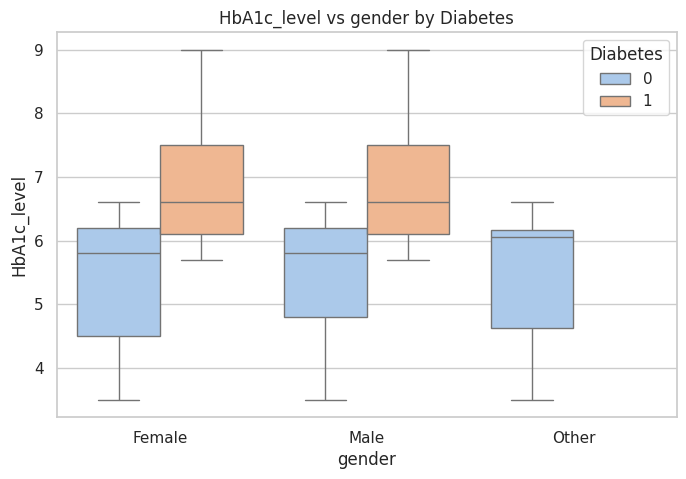

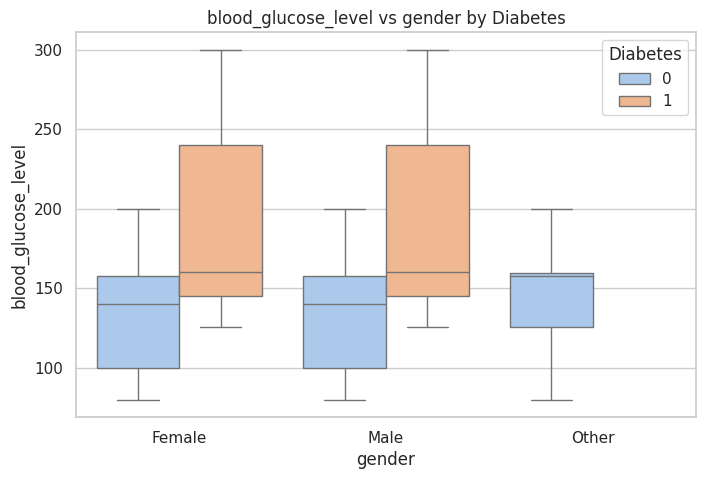

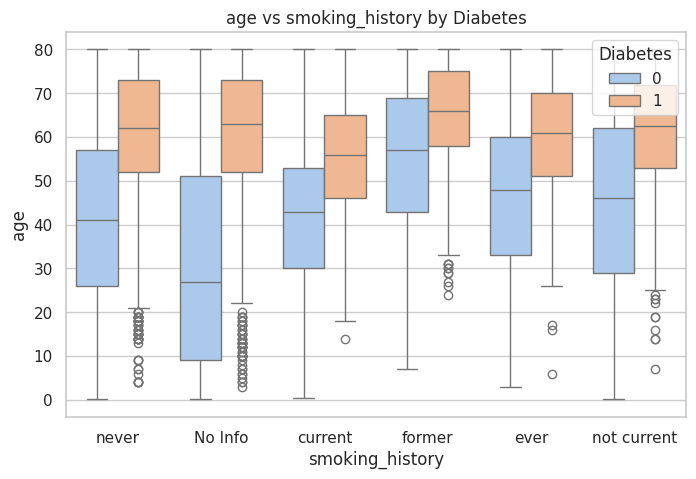

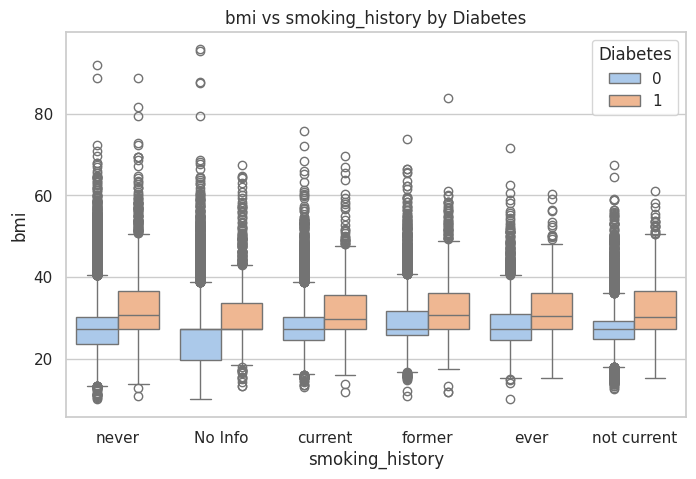

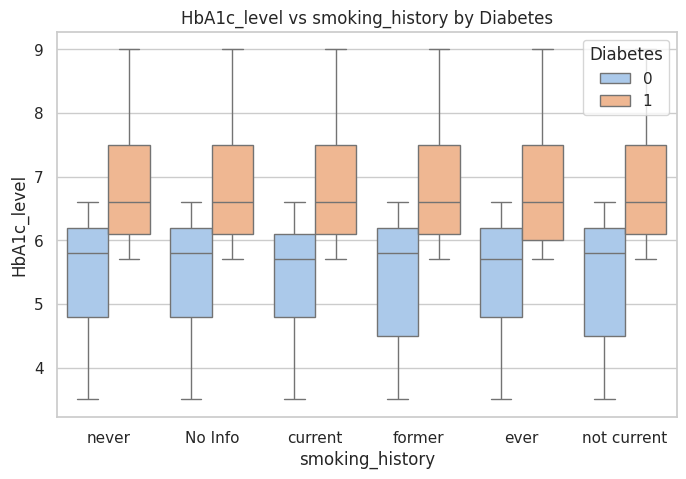

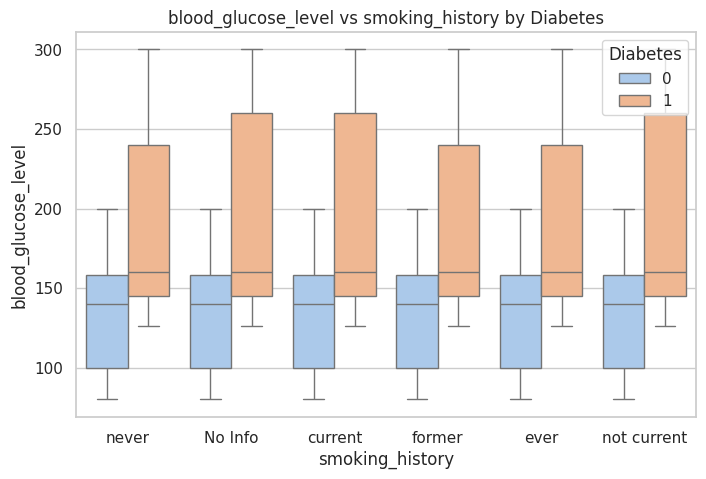

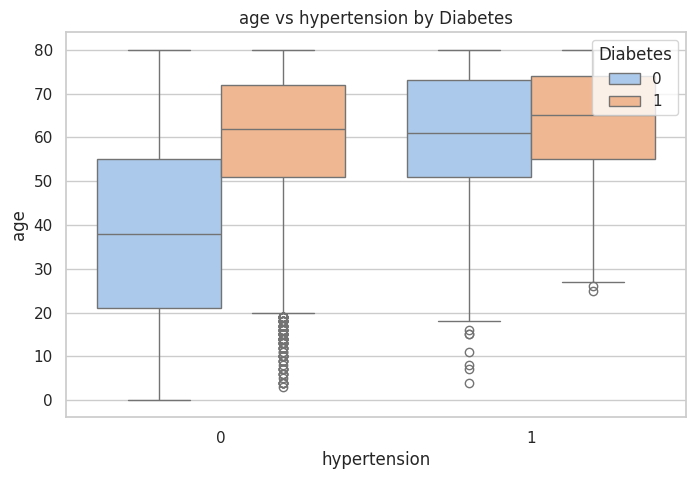

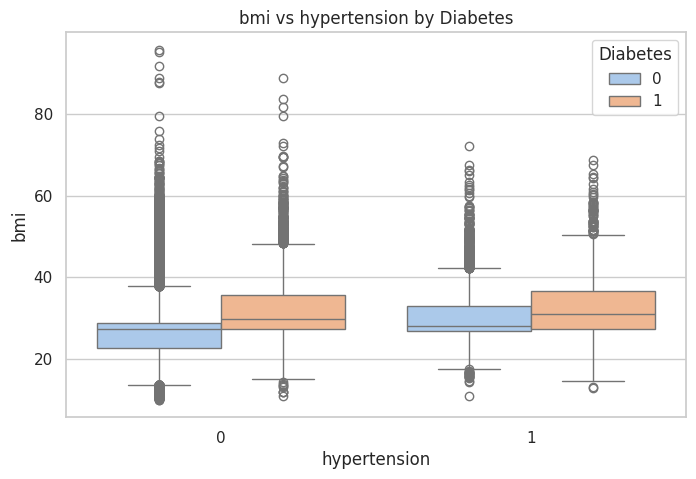

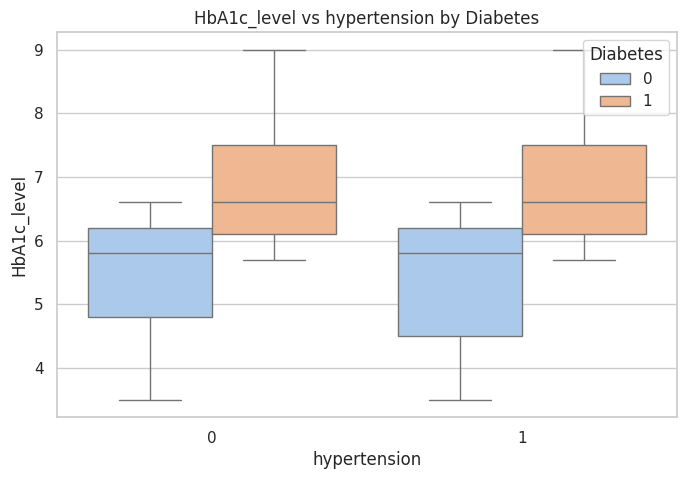

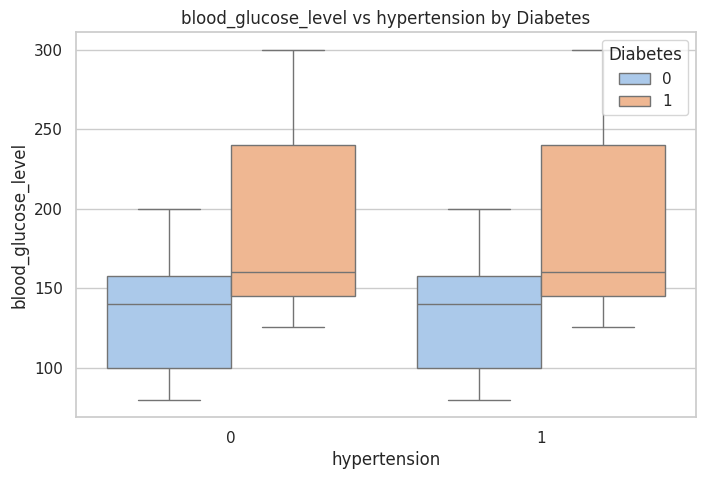

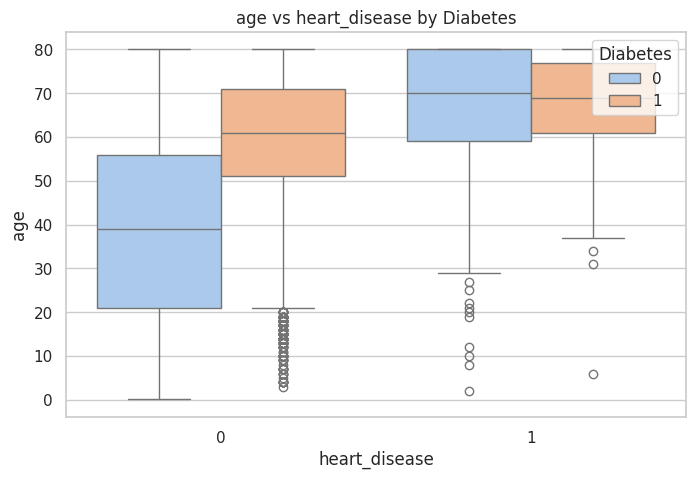

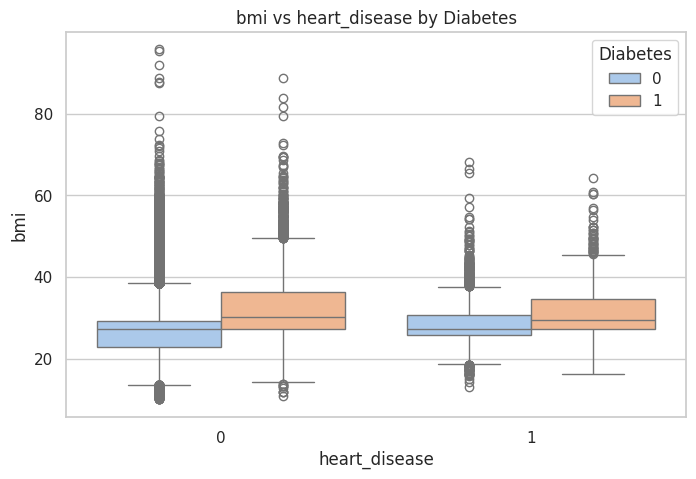

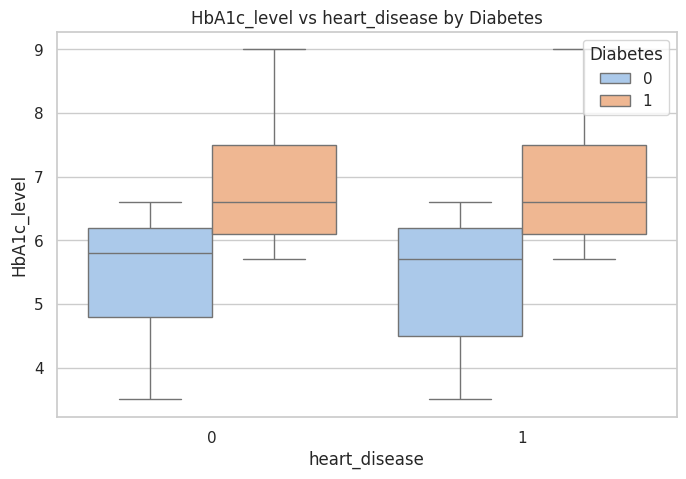

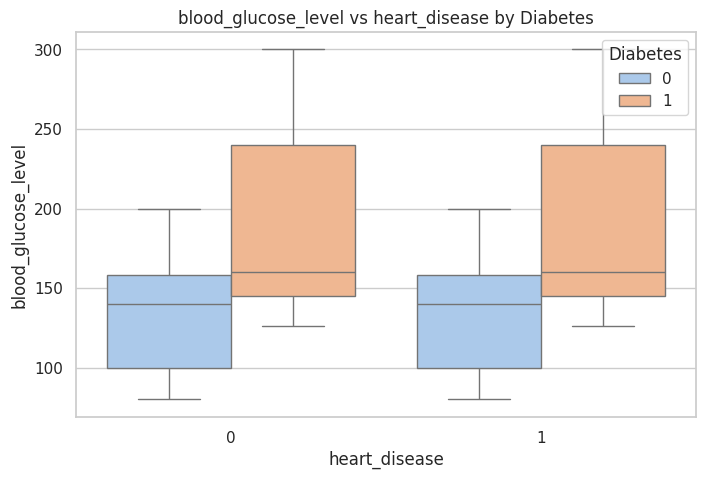

In [ ]:
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=cat_col, y=num_col, hue='diabetes', palette='pastel')
        plt.title(f'{num_col} vs {cat_col} by Diabetes')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.legend(title='Diabetes', loc='upper right')
        plt.show()

# Enhanced Correlation Matrix (with Encoded Categorical Variables)

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

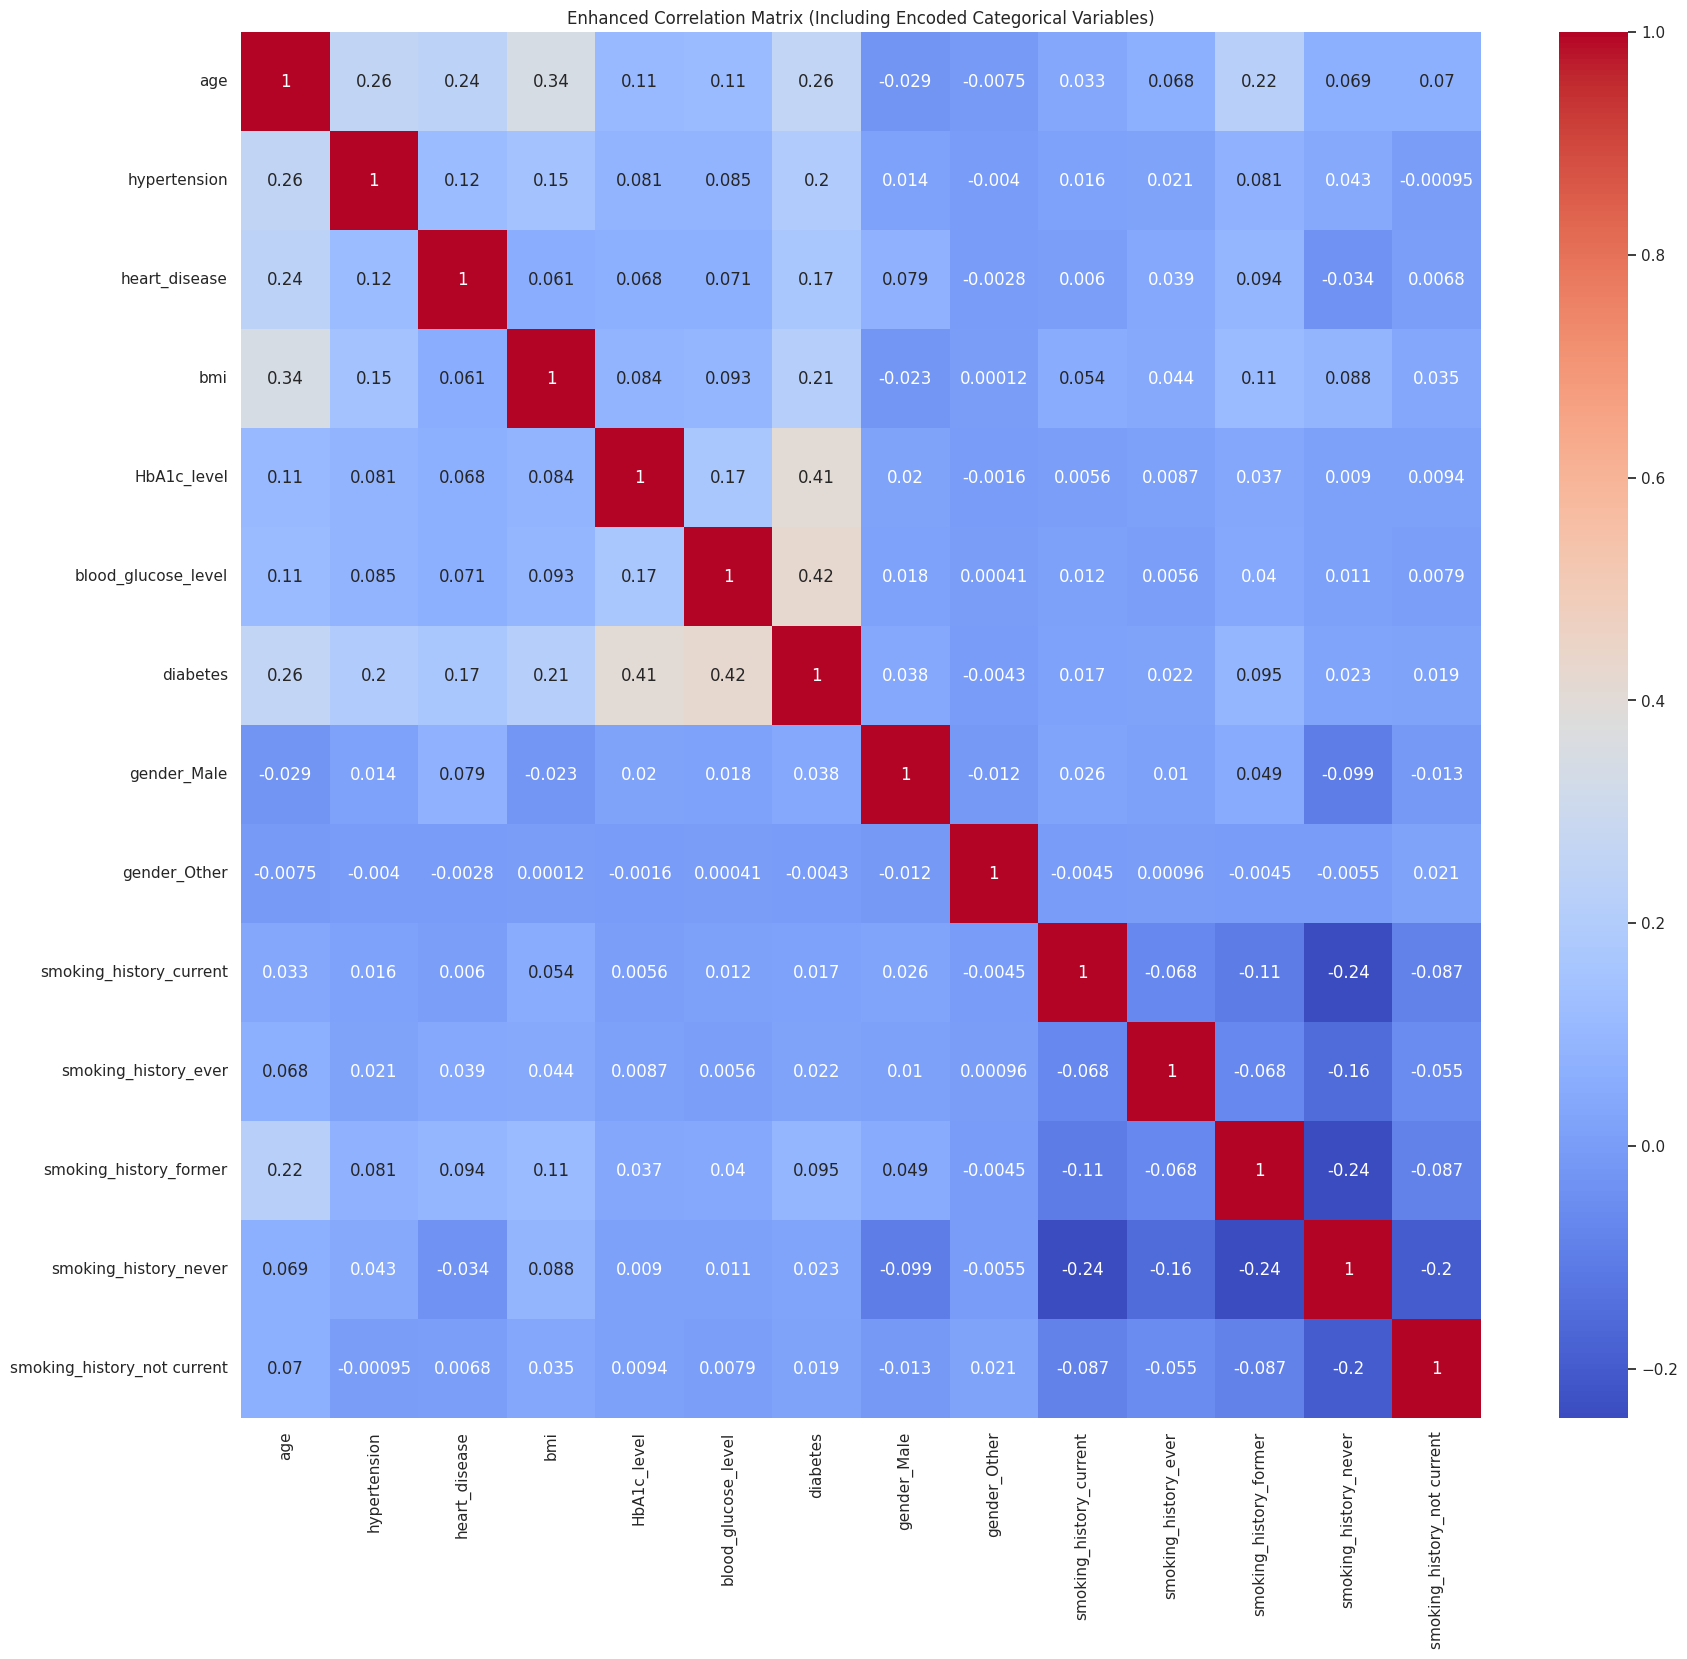

In [ ]:
encoded_data = df.copy()
encoded_data = pd.get_dummies(encoded_data, columns=['gender', 'smoking_history'], drop_first=True)
plt.figure(figsize=(20, 18))
encoded_corr_matrix = encoded_data.corr()
sns.heatmap(encoded_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Enhanced Correlation Matrix (Including Encoded Categorical Variables)')
plt.show()

# Outlier Removal using IQR Method

In [ ]:
cleaned_data = encoded_data.copy()
for col in numerical_columns:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

In [ ]:
print(f"Original dataset shape: {encoded_data.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")

Original dataset shape: (96146, 14)
Cleaned dataset shape: (88195, 14)


In [ ]:
cleaned_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


# Import cell

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Split the data into features and target**

In [ ]:
X = cleaned_data.drop('diabetes', axis=1)
y = cleaned_data['diabetes']

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_columns = ['gender', 'smoking_history']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mixed Scaling: StandardScaler for numerical features,MinMax for tree models

In [ ]:
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}



#  Apply StandardScaler to numerical features for distance-sensitive models




In [ ]:
standard_scaler = ColumnTransformer(
    transformers=[('num_standard', scalers['standard'], numerical_columns)],
    remainder='passthrough'
)



# Apply MinMaxScaler to numerical features for tree-based models



In [ ]:
minmax_scaler = ColumnTransformer(
    transformers=[('num_minmax', scalers['minmax'], numerical_columns)],
    remainder='passthrough'
)

**Different Scalers **

In [ ]:
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [ ]:
print("Shapes of transformed datasets:")
print(f"StandardScaler: X_train: {X_train_standard.shape}, X_test: {X_test_standard.shape}")
print(f"MinMaxScaler: X_train: {X_train_minmax.shape}, X_test: {X_test_minmax.shape}")


Shapes of transformed datasets:
StandardScaler: X_train: (70556, 13), X_test: (17639, 13)
MinMaxScaler: X_train: (70556, 13), X_test: (17639, 13)


In [ ]:
print("First 5 rows of StandardScaler-transformed training data:")
print(X_train_standard[:1])
print("---------------------------")
print("First 5 rows of MinMaxScaler-transformed training data:")
print(X_train_minmax[:1])

First 5 rows of StandardScaler-transformed training data:
[[0.6158042269150666 0.04456523331370411 -0.46418423051191215
  -0.9857712644047731 0 0 True False False False False False True]]
---------------------------
First 5 rows of MinMaxScaler-transformed training data:
[[0.6871871871871872 0.49690402476780204 0.3191489361702129 0.125 0 0
  True False False False False False True]]


# Importing Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Models that will use standard scaler**





In [ ]:
models_standard = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'k-NN': KNeighborsClassifier()
}

**Models that will use Minmax scaler**

In [ ]:
models_minmax = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


**Distance Based Model**

In [ ]:
print("\nResults for StandardScaler-transformed data:")
for name, model in models_standard.items():
    model.fit(X_train_standard, y_train)
    y_pred = model.predict(X_test_standard)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("            ----------------------------                   ")


Results for StandardScaler-transformed data:

Logistic Regression:
Accuracy: 0.96
Confusion Matrix:
 [[16625    90]
 [  561   363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16715
           1       0.80      0.39      0.53       924

    accuracy                           0.96     17639
   macro avg       0.88      0.69      0.75     17639
weighted avg       0.96      0.96      0.96     17639

            ----------------------------                   

SVM:
Accuracy: 0.97
Confusion Matrix:
 [[16712     3]
 [  575   349]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16715
           1       0.99      0.38      0.55       924

    accuracy                           0.97     17639
   macro avg       0.98      0.69      0.77     17639
weighted avg       0.97      0.97      0.96     17639

            ----------------------

**Tree Based Model**

In [ ]:
print("\nResults for MinMaxScaler-transformed data:")
for name, model in models_minmax.items():
    model.fit(X_train_minmax, y_train)
    y_pred = model.predict(X_test_minmax)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("            ----------------------------                   ")


Results for MinMaxScaler-transformed data:

Decision Tree:
Accuracy: 0.95
Confusion Matrix:
 [[16283   432]
 [  392   532]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     16715
           1       0.55      0.58      0.56       924

    accuracy                           0.95     17639
   macro avg       0.76      0.77      0.77     17639
weighted avg       0.95      0.95      0.95     17639

            ----------------------------                   

Random Forest:
Accuracy: 0.97
Confusion Matrix:
 [[16676    39]
 [  449   475]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     16715
           1       0.92      0.51      0.66       924

    accuracy                           0.97     17639
   macro avg       0.95      0.76      0.82     17639
weighted avg       0.97      0.97      0.97     17639

            --------------------